In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read CSV File

In [2]:
data = pd.read_csv('Suicidesindia2001-2012.csv')
data

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [3]:
data.shape

(237519, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 8.2+ MB


In [5]:
data.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

### total suicide in india

In [9]:
data.Total.sum()

13071734

### Total Suicides In India State Wise

In [19]:
odisha=data[data['State']=="Odisha"]

In [20]:
odisha.Total.sum()

267234

+ we can see for example in odisha there are 267234 suicide case from 2001 to 2012

In [29]:
## for all the sate 
data.groupby('State').Total.sum().nlargest(6)

State
Total (All India)    2911862
Total (States)       2858026
Maharashtra           901945
West Bengal           849936
Tamil Nadu            818691
Andhra Pradesh        814059
Name: Total, dtype: int64

+ here we can see that the top most states which has most number of suicide cases

<AxesSubplot:ylabel='State'>

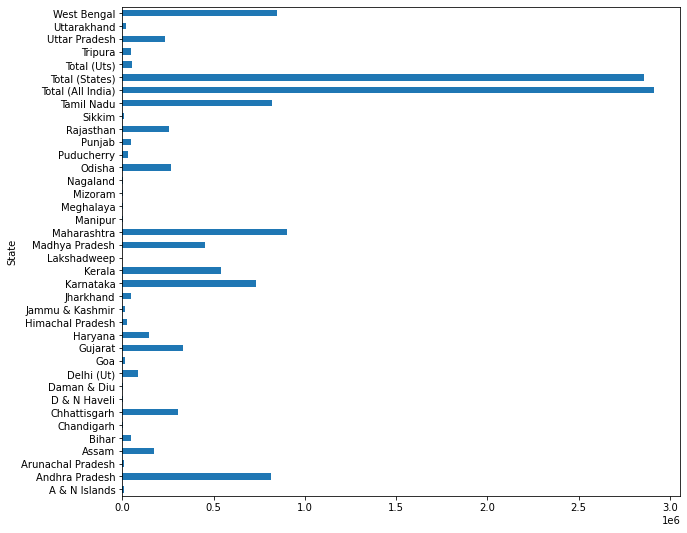

In [26]:
data.groupby('State').Total.sum().plot(kind="barh",figsize=(10,9))

## Year wise suicide case

In [30]:
year_suicide=data.groupby('Year').Total.sum()

In [35]:
year_suicide

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

<AxesSubplot:ylabel='Year'>

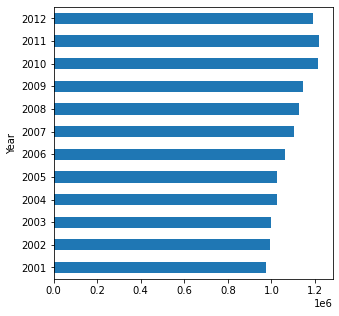

In [34]:
year_suicide.plot(kind="barh",figsize=(5,5))

+ sadly we can see that as year passes the suicide rate is also going up

### Total Suicides In India Gender Wise

In [36]:
gender_suicide=data.groupby('Gender').Total.sum()

In [37]:
gender_suicide

Gender
Female    4702974
Male      8368760
Name: Total, dtype: int64

### Total Suicides In India State-Year Wise

In [43]:
sate_year_wise=data.groupby(['State','Year']).Total.sum()

In [53]:
sate_year_wise

State          Year
A & N Islands  2001      645
               2002      720
               2003      565
               2004      610
               2005      695
                       ...  
West Bengal    2008    74260
               2009    73240
               2010    80185
               2011    82460
               2012    44871
Name: Total, Length: 456, dtype: int64

In [55]:
pd.DataFrame(sate_year_wise) 

Total
State         Year       
A & N Islands 2001    645
              2002    720
              2003    565
              2004    610
              2005    695
...                   ...
West Bengal   2008  74260
              2009  73240
              2010  80185
              2011  82460
              2012  44871

[456 rows x 1 columns]

In [57]:
data.groupby(['State','Year'])[['Total']].sum().to_html('index.html')
data.groupby(['State','Year'])[['Total']].sum().to_csv('index.csv')

### Total Suicides In India State-Gender Wise

In [58]:
data.groupby(['State','Gender'])[['Total']].sum()

Total
State             Gender        
A & N Islands     Female    2750
                  Male      5359
Andhra Pradesh    Female  271939
                  Male    542120
Arunachal Pradesh Female    1954
...                          ...
Uttar Pradesh     Male    125327
Uttarakhand       Female    7548
                  Male     10948
West Bengal       Female  365241
                  Male    484695

[76 rows x 1 columns]

### Total Suicides In India Year-Gender Wise

In [61]:
data.groupby(['Year','Gender'])[['Total']].sum()

Total
Year Gender        
2001 Female  379645
     Male    596819
2002 Female  369675
     Male    623973
2003 Female  365657
     Male    631965
2004 Female  369297
     Male    653840
2005 Female  368980
     Male    656221
2006 Female  381677
     Male    681314
2007 Female  390032
     Male    713635
2008 Female  400202
     Male    724880
2009 Female  411050
     Male    732983
2010 Female  426705
     Male    784617
2011 Female  429688
     Male    789811
2012 Female  410366
     Male    778702

### Total Suicides In India State-Year-Gender Wise

In [65]:
data.groupby(['State','Year','Gender','Type'])[['Total']].sum().to_html('index.html')

In [64]:
data.groupby('Type').Total.sum().sort_values(ascending=False).head()

Type
Married          3065322
Primary          1088481
Middle           1028913
No Education      965271
Never Married     954903
Name: Total, dtype: int64

In [78]:
data.groupby(['State','Year','Gender','Type'])[['Total']].sum().to_csv('index.csv')

In [79]:
dataf=pd.read_csv('index.csv')
dataf

,State,Year,Gender,Type,Total
0,A & N Islands,2001,Female,Bankruptcy or Sudden change in Economic,0
1,A & N Islands,2001,Female,By Consuming Insecticides,0
2,A & N Islands,2001,Female,By Consuming Other Poison,9
3,A & N Islands,2001,Female,By Drowning,1
4,A & N Islands,2001,Female,By Fire-Arms,0
...,...,...,...,...,...
56371,West Bengal,2012,Male,Student,0
56372,West Bengal,2012,Male,Suspected/Illicit Relation,0
56373,West Bengal,2012,Male,Unemployed,0
56374,West Bengal,2012,Male,Unemployment,0


In [88]:
data_2001=dataf[dataf['Year']==2001]

In [96]:
odisha_data=data_2001[data_2001['State']=="Odisha"].sort_values(ascending=False,by="Total").head()

In [97]:
odisha_data

,State,Year,Gender,Type,Total
39704,Odisha,2001,Male,Married,1294
39638,Odisha,2001,Female,Married,1181
39712,Odisha,2001,Male,Others (Please Specify),913
39631,Odisha,2001,Female,House Wife,840
39685,Odisha,2001,Male,Causes Not known,704


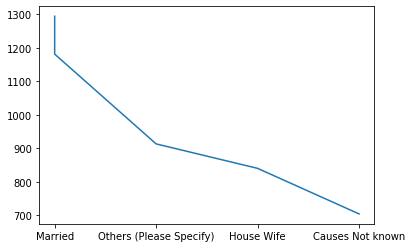

In [121]:
odisha_data=odisha_data[['Type','Total']]
x=odisha_data['Type']
y=odisha_data['Total']
              
plt.plot(x,y)